<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/inside-deep-learing/01-foundational-methods/03_loading_dataset_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading dataset objects

In PyTorch, we represent input data $X$ with a Dataset object. By using this interface, PyTorch provides efficient loaders
that automatically handle using multiple CPU cores to pre-fetch the data and keep a limited amount of data in memory at a time.

PyTorch uses a Dataset class to represent a dataset, and it encodes the information about how many items are in the dataset and how to get the nth item in the dataset.

##Setup

In [1]:
import torch
from torch.utils.data import Dataset

from sklearn.datasets import fetch_openml

import numpy as np
import pandas as pd

import timeit

from tqdm.autonotebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

##Loading MNIST dataset

In [20]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print(X.shape)

(70000, 784)


In [21]:
class SimpleDataset(Dataset):

  def __init__(self, X, y):
    super(SimpleDataset, self).__init__()
    self.X = X
    self.y = y

  def __getitem__(self, index):
    inputs = torch.tensor(self.X[index, :], dtype=torch.float32)
    targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
    return (inputs, targets)

  def __len__(self):
    return self.X.shape[0]

In [22]:
dataset = SimpleDataset(X, y)

In [23]:
print(f"Length: {len(dataset)}")

example, label = dataset[0]
print(f"Features: {example.shape}")
print(f"Label of index 0: {label}")

Length: 70000
Features: torch.Size([784])
Label of index 0: 5


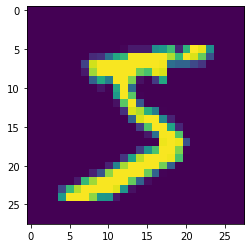

In [24]:
# visualize this by reshaping the data
plt.imshow(example.reshape((28, 28)))

In [25]:
# Let’s say we want 20% of the data to be used for testing
train_size = int(len(dataset) * .8)
test_size = len(dataset) - train_size

In [26]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))
print(f"{len(train_dataset)} examples for training and {len(test_dataset)} for testing")

56000 examples for training and 14000 for testing
